In [1]:
# Import necessary libraries
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.compose import *
from sklearn.svm import SVC
from sklearn.tree import *
from sklearn.model_selection import *
from sklearn.model_selection import *
from sklearn.discriminant_analysis import *
from sklearn.preprocessing import *
from sklearn.neighbors import *
from sklearn.naive_bayes import *
from sklearn.pipeline import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.linear_model import *
import os

warnings.simplefilter('ignore')

os.chdir('D:\Kaggle_Compititions\hrdness\playground-series-s3e25')

mohs = pd.read_csv('train.csv',index_col=0)
mohs

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
id,,,,,,,,,,,,
0,100.0,0.841611,10.000000,4.800000,20.612526,11.088100,2.766000,1.732000,0.860000,0.496070,0.91457,6.0
1,100.0,7.558488,10.000000,4.800000,20.298893,12.040830,2.755000,1.631000,0.910000,0.492719,0.71760,6.5
2,76.0,8.885992,15.600000,5.600000,33.739258,12.086300,2.828000,1.788000,0.864000,0.481478,1.50633,2.5
3,100.0,8.795296,10.000000,4.800000,20.213349,10.948500,2.648000,1.626000,0.936000,0.489272,0.78937,6.0
4,116.0,9.577996,11.600000,4.800000,24.988133,11.824480,2.766000,1.682000,0.896000,0.492736,1.86481,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10402,128.0,7.558488,12.000000,4.000000,26.385218,11.330440,2.644000,1.631000,0.892000,0.496070,1.79607,4.0
10403,30.0,1.743160,10.000000,5.333333,20.766935,14.163933,3.090000,1.556667,0.866667,0.480390,0.81480,5.0
10404,196.0,30.920000,24.500000,5.500000,53.490297,10.074300,2.295000,1.545000,1.120000,0.469715,2.11540,1.8


In [2]:
x = mohs.drop(['Hardness'], axis=True)
y = mohs['Hardness']

In [3]:
# Split the dataset into training and testing sets
# x and y are the feature and target variables, respectively
# test_size=0.3 means 30% of the data will be used for testing
# random_state=24 sets the random seed for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=24)

# Create a Decision Tree Regressor model
# random_state=24 sets the random seed for reproducibility
# max_depth=2 limits the maximum depth of the decision tree to 2 levels
dtr = DecisionTreeRegressor(random_state=24, max_depth=2)

# Train the Decision Tree Regressor model on the training data
dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=24)

# decision tree

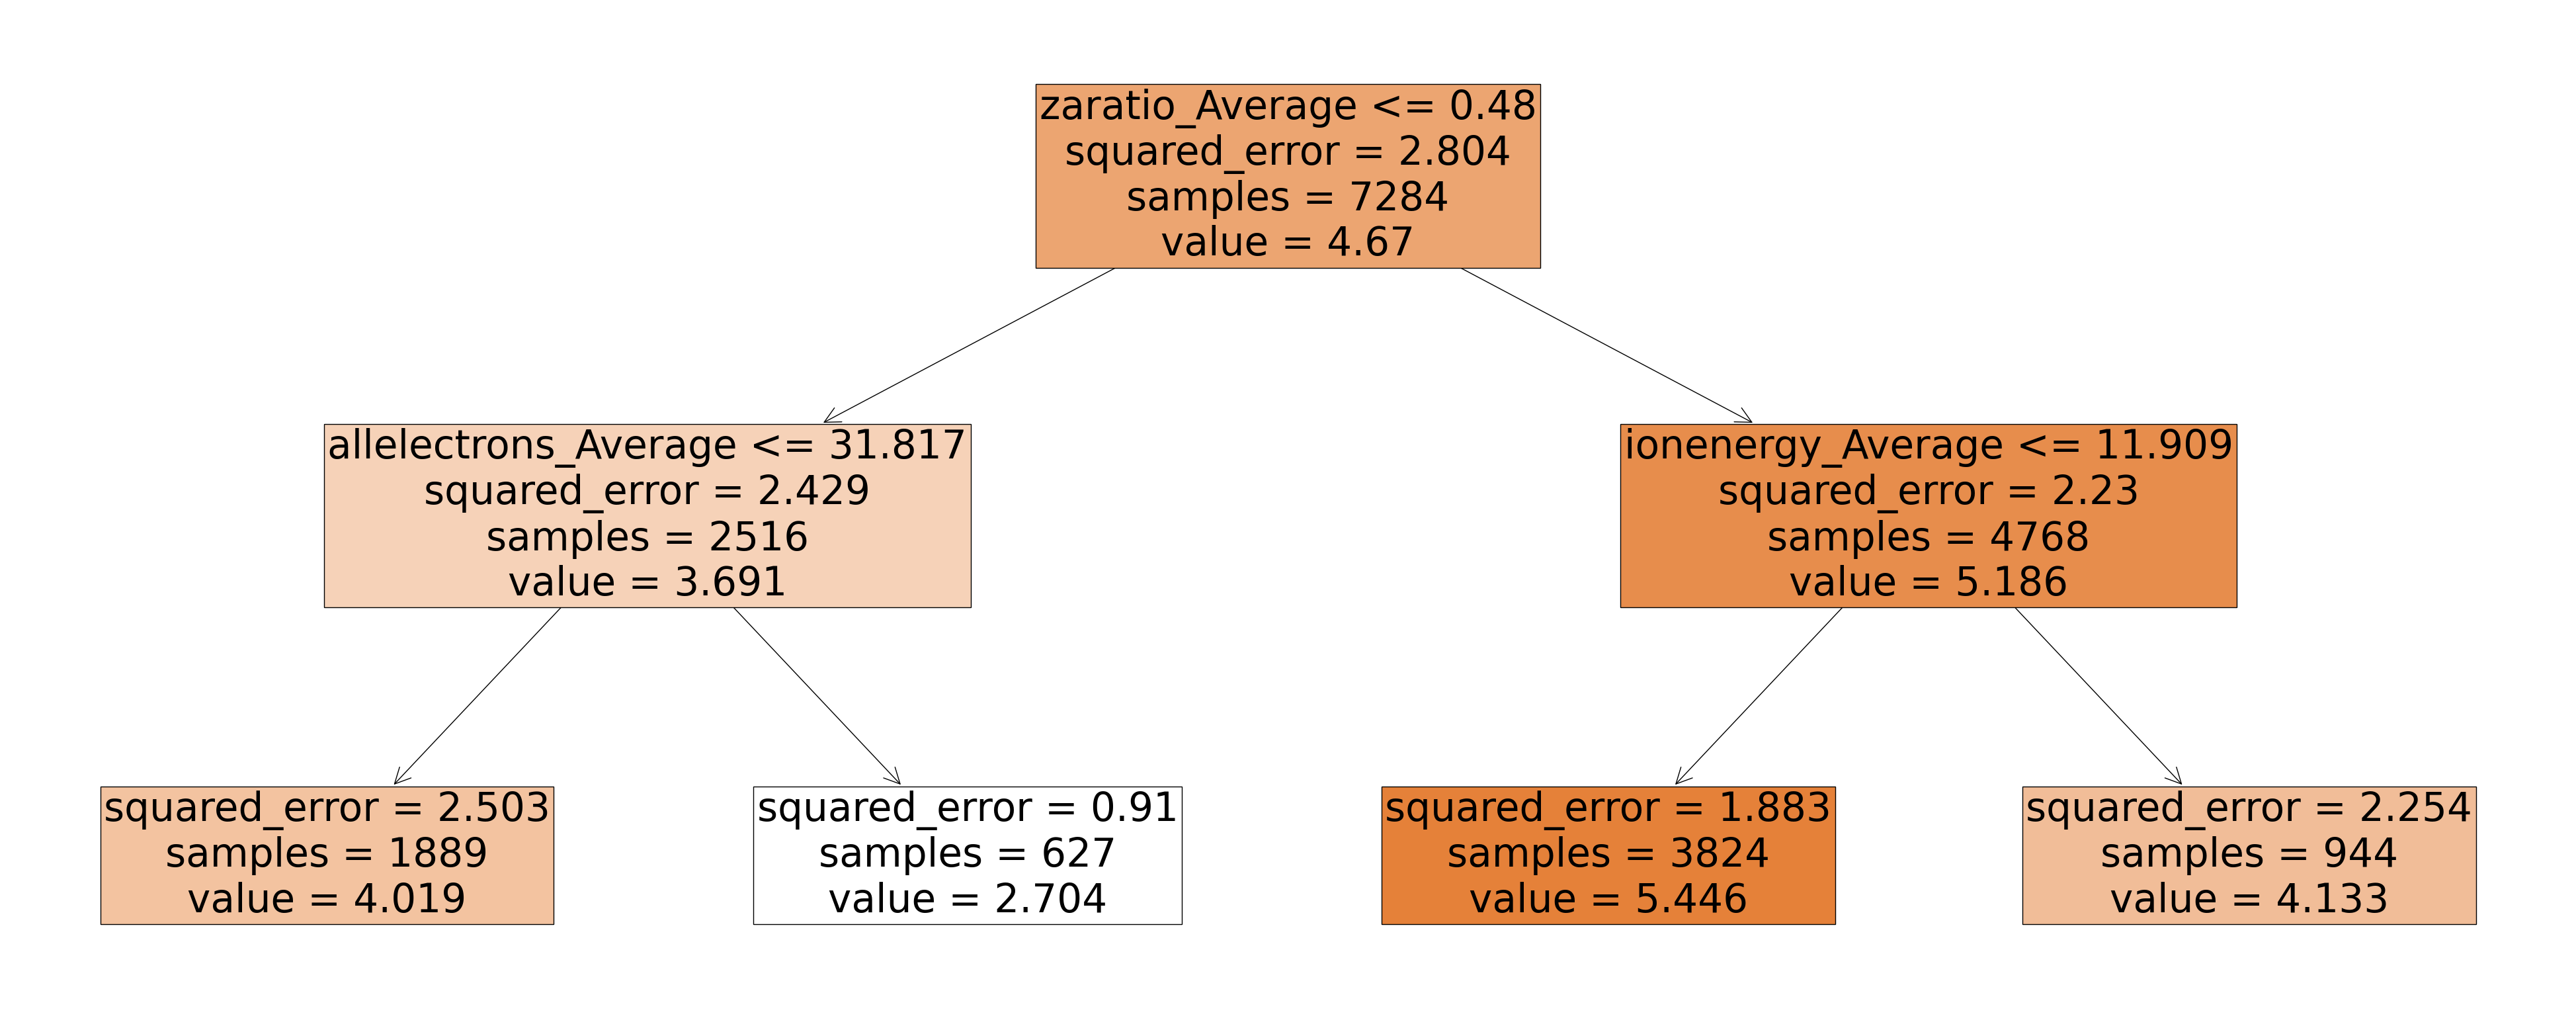

In [4]:
# Create a figure with a larger size to accommodate the tree
plt.figure(figsize=(50, 20))

# Plot the decision tree
# dtr is the trained Decision Tree Regressor model
# feature_names=x_train.columns provides the feature names for the tree
# class_names=['0', '1'] sets the class names for the tree (not applicable for regression)
# filled=True fills the tree nodes with colors
# fontsize=43 sets the font size for the tree
plot_tree(dtr, feature_names=x_train.columns, class_names=['0', '1'], filled=True, fontsize=43)

# Display the plot
plt.show()

In [5]:
# Use the trained Decision Tree Regressor model to make predictions on the test data
y_pred = dtr.predict(x_test)

# Calculate the R-squared (coefficient of determination) score
# y_test is the true target values
# y_pred is the predicted target values
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print(r2)

0.26721483958247927


# gridsearch 

In [6]:
# Define the hyperparameter grid for the Decision Tree Regressor
params = {
    'max_depth': [2, 5, 7, 10, 13, None],
    'min_samples_split': [2, 5, 7, 10, 13],
    'min_samples_leaf': [1, 5, 7, 0, 10, 13]
}

# Create a 5-fold cross-validation object with shuffling and a random state of 24
kfold = KFold(n_splits=5, shuffle=True, random_state=24)

# Create a Decision Tree Regressor model with a random state of 24
dtr = DecisionTreeRegressor(random_state=24)

# Create a GridSearchCV object to perform hyperparameter tuning
# dtr is the base estimator
# param_grid=params is the hyperparameter grid to search
# cv=kfold is the cross-validation object
# scoring='neg_median_absolute_error' is the evaluation metric to use (negative median absolute error)
gcv = GridSearchCV(dtr, param_grid=params, cv=kfold, scoring='neg_median_absolute_error')

# Fit the GridSearchCV object to the data
gcv.fit(x, y)

# Print the best hyperparameters found by the grid search
print(gcv.best_params_)

# Print the best score (negative median absolute error) achieved by the grid search
print(gcv.best_score_)

{'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2}
-0.625187561559025


# best tree

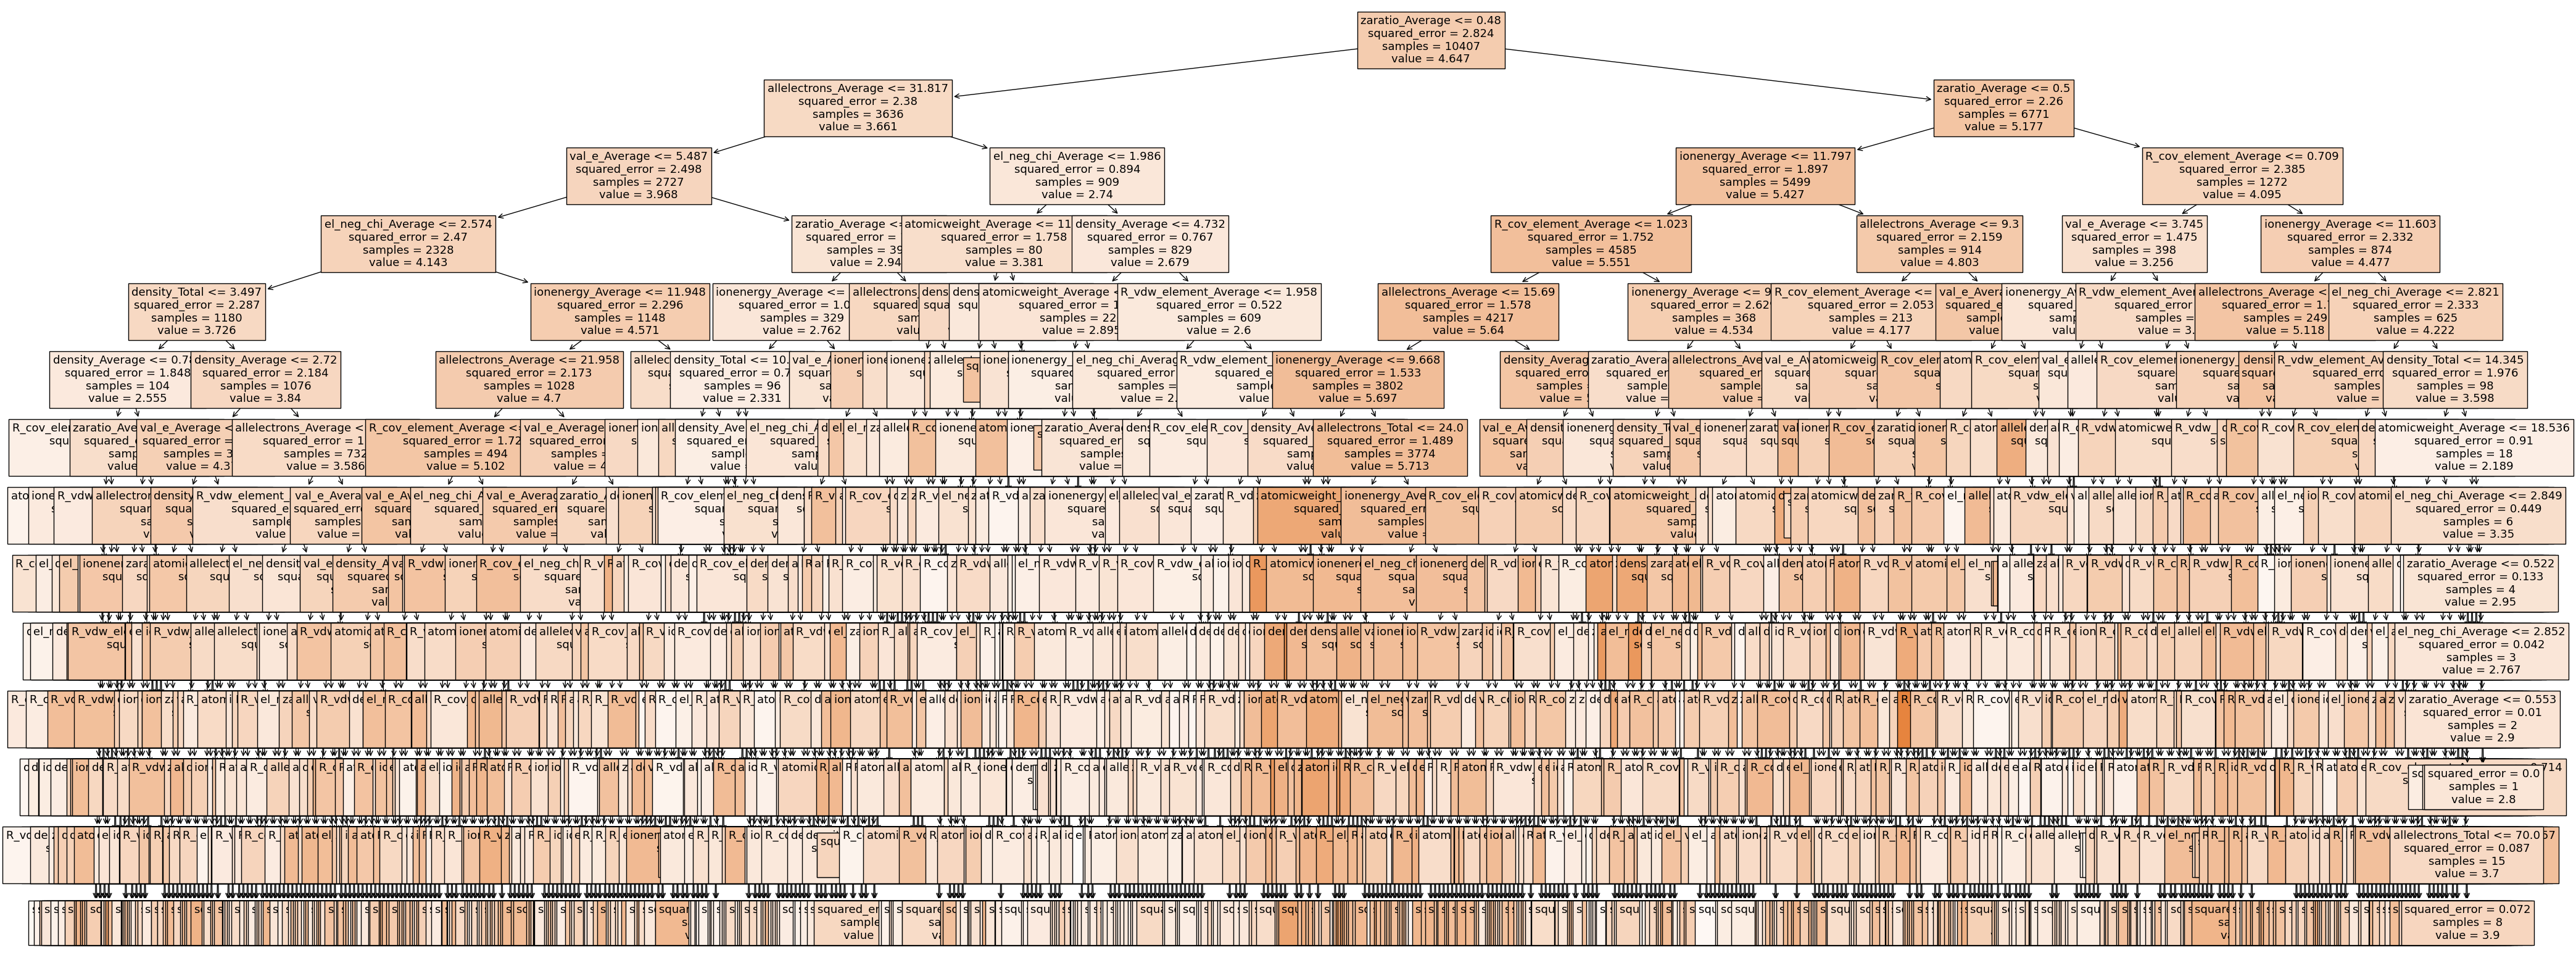

In [7]:
# Get the best estimator (Decision Tree Regressor) from the GridSearchCV object
best_tree = gcv.best_estimator_

# Create a figure with a larger size to accommodate the tree
plt.figure(figsize=(50, 20))

# Plot the best decision tree
# best_tree is the best estimator found by the GridSearchCV
# feature_names=x.columns provides the feature names for the tree
# class_names=['0', '1'] sets the class names for the tree (not applicable for regression)
# filled=True fills the tree nodes with colors
# fontsize=13 sets the font size for the tree
plot_tree(best_tree, feature_names=x.columns, class_names=['0', '1'], filled=True, fontsize=13)

# Display the plot
plt.show()

# feature importance

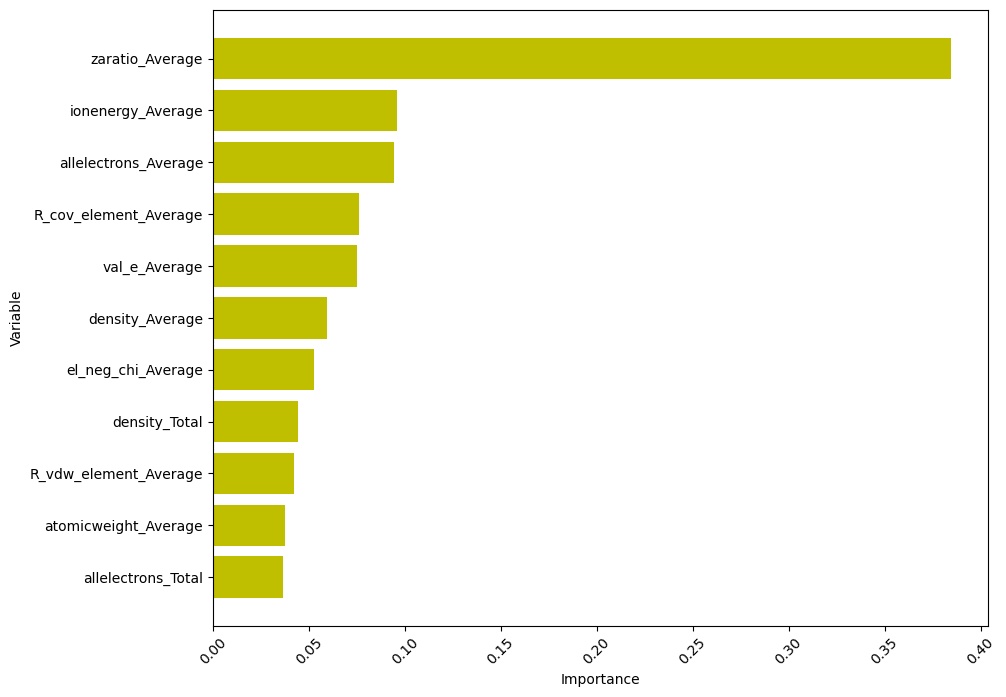

In [8]:
# Create a pandas DataFrame with the feature names and importances
pd_imp = pd.DataFrame({'var': list(x.columns), 'imp': best_tree.feature_importances_})

# Sort the DataFrame by the feature importances in ascending order
pd_imp.sort_values(by='imp', inplace=True)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize=(10, 8))
plt.barh(pd_imp['var'], pd_imp['imp'], color='y')

# Set the x-axis label
plt.xlabel('Importance')

# Rotate the x-axis tick labels by 45 degrees
plt.xticks(rotation=45)

# Set the y-axis label
plt.ylabel('Variable')

# Display the plot
plt.show()

# inferencing

In [9]:
best_model = gcv.best_estimator_

# Load the test data into a DataFrame named "test"
test_data = pd.read_csv("test.csv",index_col=0)

pred_smok = best_model.predict(test_data)

# Load the sample submission file into a DataFrame named "submit"
submit = pd.read_csv("sample_submission.csv")

# Replace the predicted hardness values in the submission file
submit['Hardness'] = pred_smok

# Save the submission file with the predicted hardness values
submit.to_csv("D:/Kaggle_Compititions/hrdness/playground-series-s3e25/hard_24_jun.csv", index=False)